In [81]:
!git clone https://github.com/victor-nasc/LIBRAS-Recognition.git

fatal: destination path 'LIBRAS-Recognition' already exists and is not an empty directory.


In [40]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np

In [80]:
# Load the CSV file
df = pd.read_csv('./data.csv')
df.head()

,label,x0,y0,z0,x1,y1,z1,x2,y2,z2,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,A,0.137681,1.0,0.736842,0.565217,0.937931,0.315789,0.898551,0.682759,0.263158,...,0.710526,0.057971,0.082759,0.447368,0.094203,0.303448,0.736842,0.079710,0.358621,1.0
1,A,0.120567,1.0,0.842105,0.539007,0.925170,0.421053,0.879433,0.693878,0.368421,...,0.736842,0.063830,0.088435,0.394737,0.085106,0.312925,0.710526,0.070922,0.360544,1.0
2,A,0.108696,1.0,0.815789,0.550725,0.918919,0.368421,0.891304,0.689189,0.263158,...,0.736842,0.072464,0.081081,0.394737,0.094203,0.304054,0.684211,0.072464,0.351351,1.0
3,A,0.120567,1.0,0.888889,0.546099,0.906040,0.416667,0.886525,0.671141,0.277778,...,0.722222,0.078014,0.093960,0.361111,0.106383,0.302013,0.694444,0.070922,0.335570,1.0
4,A,0.127660,1.0,1.000000,0.546099,0.899329,0.485714,0.879433,0.671141,0.314286,...,0.685714,0.070922,0.080537,0.314286,0.106383,0.281879,0.657143,0.070922,0.328859,1.0


In [84]:
# Assuming the CSV file has features in columns 1 to n-1 and the target variable in column 0
# Adjust the indices based on your specific CSV structure
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# One Hot Encoding
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [43]:
input_dim = X_train.shape[1]
n_classes = 21

# Build the neural network
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=input_dim))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=n_classes, activation='softmax'))

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                4096      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 21)                693       
                                                                 
Total params: 6869 (26.83 KB)
Trainable params: 6869 (26.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/100
269/269 [==============================] - 2s 3ms/step - loss: 2.0411 - accuracy: 0.4332 - val_loss: 0.9960 - val_accuracy: 0.7480
Epoch 2/100
269/269 [==============================] - 1s 3ms/step - loss: 0.7000 - accuracy: 0.7971 - val_loss: 0.5338 - val_accuracy: 0.8354
Epoch 3/100
269/269 [==============================] - 1s 3ms/step - loss: 0.4395 - accuracy: 0.8689 - val_loss: 0.3684 - val_accuracy: 0.8819
Epoch 4/100
269/269 [==============================] - 1s 3ms/step - loss: 0.3174 - accuracy: 0.9045 - val_loss: 0.2904 - val_accuracy: 0.9070
Epoch 5/100
269/269 [==============================] - 1s 3ms/step - loss: 0.2464 - accuracy: 0.9254 - val_loss: 0.2256 - val_accuracy: 0.9247
Epoch 6/100
269/269 [==============================] - 1s 3ms/step - loss: 0.1965 - accuracy: 0.9415 - val_loss: 0.1841 - val_accuracy: 0.9479
Epoch 7/100
269/269 [==============================] - 1s 2ms/step - loss: 0.1594 - accuracy: 0.9583 - val_loss: 0.1611 - val_accuracy: 0.9549

In [46]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

68/68 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9954
Test loss: 0.0144
Test accuracy: 0.9954


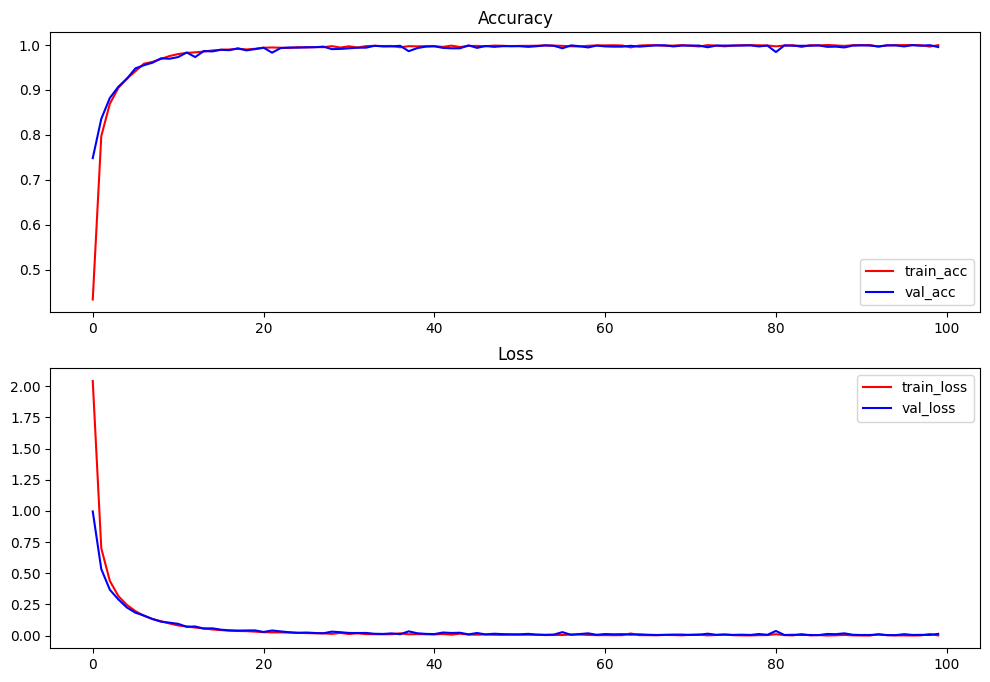

In [48]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(2, 1)
figure.set_size_inches(12, 8)

axis[0].plot(history.history['accuracy'], color='red', label='train_acc')
axis[0].plot(history.history['val_accuracy'], color='blue', label='val_acc')
axis[0].set_title("Accuracy")
axis[0].legend()  # Add legend to the first subplot

axis[1].plot(history.history['loss'], color='red', label='train_loss')
axis[1].plot(history.history['val_loss'], color='blue', label='val_loss')
axis[1].set_title("Loss")
axis[1].legend()


plt.show()



In [47]:
model.save('your_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']

aaa = model.predict(X_train)


269/269 [==============================] - 1s 3ms/step


In [50]:
for i in range(len(aaa)):
    if labels[np.argmax(aaa[i])] != labels[np.argmax(y_train[i])]:
        print(labels[np.argmax(aaa[i])], labels[np.argmax(y_train[i])])

M N
M N
Q N
M N
Q N
M N
M N
M N
M N
M N
M N
M N
M N
T F
M N
T F
M N
M N
M N
M N


In [72]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

history = model.fit(X_train, y_train)

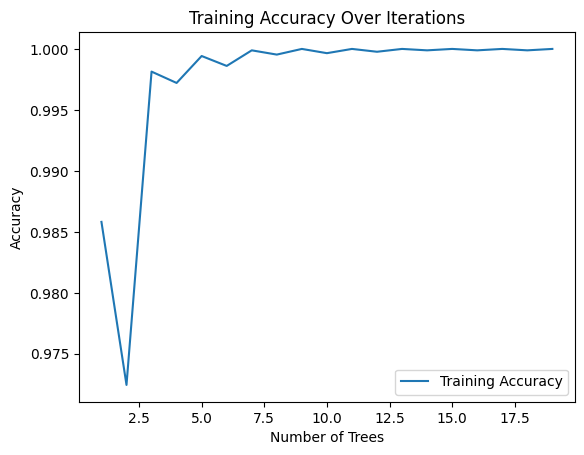

In [73]:
train_accuracies = []
for i in range(1, 20):
    model.n_estimators = i
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

# Plot the training accuracy over each iteration
plt.plot(np.arange(1, 20), train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy Over Iterations')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [74]:
y_predict = model.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_predict, y_test)

In [76]:
score

0.99721059972106

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [85]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [88]:
y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9860529986052998
Classification Report:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00       108
           B       1.00      1.00      1.00       111
           C       0.99      1.00      1.00       116
           D       1.00      0.94      0.97       114
           E       1.00      0.99      0.99        95
           F       0.97      0.93      0.95        99
           G       0.99      1.00      1.00       104
           I       1.00      1.00      1.00       105
           L       0.94      0.99      0.96       105
           M       0.97      1.00      0.98        97
           N       0.99      0.97      0.98       101
           O       1.00      1.00      1.00       112
           P       1.00      0.99      0.99        98
           Q       1.00      0.99      0.99        94
           R       1.00      0.95      0.98       104
           S       1.00      1.00      1.00        91
           T       0.94     

In [107]:
from sklearn.svm import SVC
for i in range(2,15):
  svm_model = SVC(kernel='linear', C=i, random_state=42)

  # Train the model on the training data
  svm_model.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = svm_model.predict(X_test)
  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{i} is Accuracy: {accuracy}")

2 is Accuracy: 0.99767549976755
3 is Accuracy: 0.99767549976755
4 is Accuracy: 0.99767549976755
5 is Accuracy: 0.99767549976755
6 is Accuracy: 0.99814039981404
7 is Accuracy: 0.99860529986053
8 is Accuracy: 0.99814039981404
9 is Accuracy: 0.99860529986053
10 is Accuracy: 0.99860529986053
11 is Accuracy: 0.99860529986053
12 is Accuracy: 0.99860529986053
13 is Accuracy: 0.99860529986053
14 is Accuracy: 0.99860529986053


In [103]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(2,10):
  # Create a KNN model
  knn_model = KNeighborsClassifier(n_neighbors=i)  # You can adjust the number of neighbors as needed

  # Train the model on the training data
  knn_model.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = knn_model.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{i} has Accuracy: {accuracy}")

2 has Accuracy: 0.99907019990702
3 has Accuracy: 0.99953509995351
4 has Accuracy: 0.99953509995351
5 has Accuracy: 0.99860529986053
6 has Accuracy: 0.99860529986053
7 has Accuracy: 0.99860529986053
8 has Accuracy: 0.99814039981404
9 has Accuracy: 0.99767549976755
